In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from supervised.automl import AutoML

In [2]:
import supervised
supervised.__version__

'0.5.3'

In [3]:
data = datasets.load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"], name="target").map({i:v for i, v in enumerate(data["target_names"])})

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

In [6]:
# Use 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [7]:
automl = AutoML(total_time_limit=5*60)
automl.fit(X_train, y_train)

Create directory AutoML_1
AutoML task to be solved: multiclass_classification
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will optimize for metric: logloss
1_Baseline final logloss 1.0986122886681098 time 0.12 seconds
2_DecisionTree final logloss 0.025674080761460934 time 32.68 seconds
3_Linear final logloss 0.12528998643002306 time 27.06 seconds
4_Default_RandomForest final logloss 0.13841451662668633 time 25.67 seconds
5_Default_Xgboost final logloss 0.21211573131451453 time 17.02 seconds
6_Default_NeuralNetwork final logloss 0.006362229541208662 time 10.71 seconds
Ensemble final logloss 0.006362229541208662 time 0.54 seconds


In [8]:
# Predict
y_predicted = automl.predict(X_test)

result = pd.DataFrame({"Predicted": y_predicted, "Target": np.array(y_test)})
filtro = result.Predicted == result.Target
print(filtro.value_counts(normalize=True))

True     0.955556
False    0.044444
dtype: float64


In [9]:
# confusion matrix
df = pd.DataFrame(result)
confusion_matrix = pd.crosstab(df['Target'], df['Predicted'], rownames=['Target'], colnames=['Predicted'], margins = True)
confusion_matrix

Predicted,setosa,versicolor,virginica,All
Target,,,,
setosa,15,0,0,15
versicolor,0,15,0,15
virginica,0,2,13,15
All,15,17,13,45


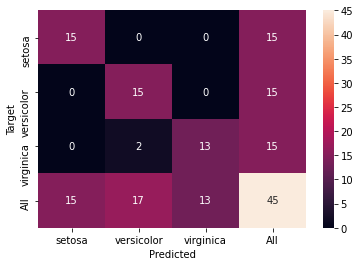

In [10]:
# Plot with seaborn
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(confusion_matrix, annot=True)
plt.show()